### Business context

Online streaming platforms like Netflix have plenty of movies in their repositories and if we can build a recommendation system to recommend relevant movies to the users based on their historical interactions, this would improve customer satisfaction and hence improve revenue. The techniques that we will learn here will not only be limited to movies, it can be any item for which you want to build a recommendation system. For this project, you can find the dataset [here](https://www.kaggle.com/somnambwl/bookcrossing-dataset)

### Task 1 - Understanding collaborative filtering and dataset

![alt text](collaborative_filtering.png "User Item Interactions")

In this type of recommendation system, `we do not need any information` about the users or items. We only need user item interaction data to build a collaborative recommendation system. For example - 
<ol>
    <li><b>Ratings</b> provided by users. For example - ratings of books on goodread, movie ratings on imdb etc</li>
    <li><b>Likes</b> of users on different facebook posts, likes on youtube videos</li>
    <li><b>Use/buying</b> of a product by users. For example - buying different items on e-commerce sites</li>
    <li><b>Reading</b> of articles by readers on various blogs</li>
</ol>    

In [1]:
# import libraries

import pandas as pd

In [2]:
# import dataset

df = pd.read_csv("./ratings_small.csv")

In [3]:
# observe the head of the dataset

df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


in this dataset, the variable `timestamp` is not helpful to build this recommendation system, so we can delete this variable from our dataset

In [4]:
# remove the variable timestamp from the dataset
df = df.drop(["timestamp"],axis=1)


In [5]:
df.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [115]:

df3=df.groupby(['movieId'])['rating'].count().sort_values(ascending=False)

In [116]:
df3

movieId
356       341
296       324
318       311
593       304
260       291
         ... 
31956       1
31963       1
31973       1
32022       1
163949      1
Name: rating, Length: 9066, dtype: int64

### Task 2: Exploring the dataset

In [6]:
# see the shape of the dataset
df.shape


(100004, 3)

In [7]:
# check for missing values
print(df.isnull().values.sum())


0


In [8]:
# total number of unique users

df["userId"].nunique()

671

In [9]:
# total number of unique movies

df["movieId"].nunique()

9066

In [10]:
df["userId"].nunique() * df["movieId"].nunique()

6083286

In [15]:
# which user has rated the most



df2=df.groupby(['userId'])['movieId'].count().sort_values(ascending=False).head(1)
print(df2)

userId
547    2391
Name: movieId, dtype: int64


In [25]:
df2 = df.groupby(['userId']).count().rename(columns={'movieId':'count'})

df2 = df2.reset_index()
df2 = df2.drop(["rating"],axis = 1)

In [114]:
df2


,userId,count
0,1,20
1,2,76
2,3,51
3,4,204
4,5,100
...,...,...
666,667,68
667,668,20
668,669,37
669,670,31


<AxesSubplot: >

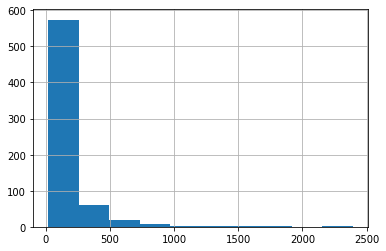

In [33]:
# create a histogram of all the interactions by all the users present in the dataset
df2["count"].hist()


### Task 3: Creating user item matrix

Creating user item interactions matrix

In [35]:
# create the user item matrix using the ratings dataset - Hint: try using pivot function 

interactions_matrix = df.pivot(index = "userId", columns = "movieId", values= "rating") 



In [36]:
# check the shape of the matrix
interactions_matrix.shape


(671, 9066)

In [37]:
# check head of the matrix and see how it looks like

interactions_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# replace all the missing values with zero

interactions_matrix = interactions_matrix.fillna(0)

In [41]:
interactions_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Task 4: Finding similar users

![alt text](cosine.png "Cosine Similarity")

In [80]:
from sklearn.metrics.pairwise import cosine_similarity

def similar_users(user_id, interactions_matrix):
    

    numusers = interactions_matrix.shape[0]
    nummovies =  interactions_matrix.shape[1]
    similarity = []

    for user in range(1, numusers+1):
        similarity_score = cosine_similarity([interactions_matrix.loc[user_id]], [interactions_matrix.loc[user]])
        similarity.append((user, similarity_score))
    # similarity.remove()
    for tup in similarity:
        if tup[0] == user_id:
            similarity.remove(tup)

    similarity.sort(key = lambda x: x[1],reverse=True)
    most_similar_users = [tup[0] for tup in similarity]
    similarscores = [tup[1] for tup in similarity]
    

       
    return list(zip(most_similar_users,similarscores))

In [87]:
# check the implemented function above


### Task 5: Creating similarity based collaborative recommendation system

In [112]:
def recommendations(user_id, num_of_movies, interactions_matrix):
    
    similar_users(user_id,interactions_matrix)
    mostsimilar_users = [tup[0] for tup in similarity]
    already_interacted = np.nonzero(interactions_matrix.loc[user_id].tolist() )[0].tolist()
    rec=[]
    for similaruser in mostsimilar_users:
        if len(rec) < num_of_movies:
            similarusermovieids = np.nonzero(interactions_matrix.loc[similaruser].tolist() )[0].tolist()
            similarusermovieids = list(set(similarusermovieids) - set(already_interacted))
            similarusermovieids = list(set(similarusermovieids) - set(rec))
            rec.extend(similarusermovieids)
        else:
            break

        return rec[:num_of_movies]


In [113]:
# check the implemented function above
recommendations(667,10,interactions_matrix)


[384, 258, 519, 520, 9, 522, 139, 263, 525, 142]

### Task 6: Conclusion

![alt text](CF.png "Similarity Based Collaborative Filtering")
image source - https://www.xpertup.com/downloads/movie-recommender-system/

Can you recommend three movies to a new user which do not have interactions history in the dataset?

In [ ]:
# recommend top three movies to the new user

